lien de l'image docker utilisée : 
https://github.com/rnakato/ShortCake

d'abord lancer : 
```{bash}
sbatch "7_Article/script/script_Val/0_launch_jupyter.sh"
```

In [32]:
#list des libraries dispo 
.libPaths()
#voir les packages installés et leurs caractéristiques
installed.packages()

#juste voir les noms 
rownames(installed.packages())

[1] "/usr/local/lib/R/site-library" "/usr/lib/R/site-library"      
[3] "/usr/lib/R/library"

,Package,LibPath,Version,Priority,Depends,Imports,LinkingTo,Suggests,Enhances,License,License_is_FOSS,License_restricts_use,OS_type,MD5sum,NeedsCompilation,Built
abind,abind,/usr/local/lib/R/site-library,1.4-8,NA,R (>= 1.5.0),"methods, utils",NA,NA,NA,MIT + file LICENSE,NA,NA,NA,NA,no,4.4.1
ade4,ade4,/usr/local/lib/R/site-library,1.7-22,NA,R (>= 2.10),"graphics, grDevices, methods, stats, utils, MASS, pixmap, sp, Rcpp","Rcpp, RcppArmadillo","ade4TkGUI, adegraphics, adephylo, ape, CircStats, deldir, lattice, spdep, splancs, waveslim, progress, foreach, parallel, doParallel, iterators",NA,GPL (>= 2),NA,NA,NA,NA,yes,4.4.1
alabaster.base,alabaster.base,/usr/local/lib/R/site-library,1.4.2,NA,NA,"alabaster.schemas, methods, utils, S4Vectors, rhdf5 (>= 2.47.6), jsonlite, jsonvalidate, Rcpp","Rcpp, Rhdf5lib","BiocStyle, rmarkdown, knitr, testthat, digest, Matrix",NA,MIT + file LICENSE,NA,NA,NA,NA,yes,4.4.1
alabaster.matrix,alabaster.matrix,/usr/local/lib/R/site-library,1.4.2,NA,alabaster.base,"methods, BiocGenerics, S4Vectors, DelayedArray (>= 0.27.2), S4Arrays, SparseArray, rhdf5 (>= 2.47.1), HDF5Array, Matrix, Rcpp",Rcpp,"testthat, knitr, BiocStyle, chihaya, BiocSingular, ResidualMatrix",NA,MIT + file LICENSE,NA,NA,NA,NA,yes,4.4.1
alabaster.ranges,alabaster.ranges,/usr/local/lib/R/site-library,1.4.2,NA,"GenomicRanges, alabaster.base","methods, S4Vectors, BiocGenerics, IRanges, GenomeInfoDb, rhdf5",NA,"testthat, knitr, BiocStyle, jsonlite",NA,MIT + file LICENSE,NA,NA,NA,NA,no,4.4.1
alabaster.sce,alabaster.sce,/usr/local/lib/R/site-library,1.4.0,NA,"SingleCellExperiment, alabaster.base","methods, alabaster.se, jsonlite",NA,"knitr, testthat, BiocStyle, rmarkdown",NA,MIT + file LICENSE,NA,NA,NA,NA,no,4.4.1
alabaster.schemas,alabaster.schemas,/usr/local/lib/R/site-library,1.4.0,NA,NA,NA,NA,"knitr, rmarkdown, BiocStyle",NA,MIT + file LICENSE,NA,NA,NA,NA,no,4.4.1
alabaster.se,alabaster.se,/usr/local/lib/R/site-library,1.4.1,NA,"SummarizedExperiment, alabaster.base","methods, alabaster.ranges, alabaster.matrix, BiocGenerics, S4Vectors, IRanges, GenomicRanges, jsonlite",NA,"rmarkdown, knitr, testthat, BiocStyle",NA,MIT + file LICENSE,NA,NA,NA,NA,no,4.4.1
annotate,annotate,/usr/local/lib/R/site-library,1.82.0,NA,"R (>= 2.10), AnnotationDbi (>= 1.27.5), XML","Biobase, DBI, xtable, graphics, utils, stats, methods, BiocGenerics (>= 0.13.8), httr",NA,"hgu95av2.db, genefilter, Biostrings (>= 2.25.10), IRanges, rae230a.db, rae230aprobe, tkWidgets, GO.db, org.Hs.eg.db, org.Mm.eg.db, humanCHRLOC, Rgraphviz, RUnit, BiocStyle, knitr",NA,Artistic-2.0,NA,NA,NA,NA,no,4.4.1
AnnotationDbi,AnnotationDbi,/usr/local/lib/R/site-library,1.66.0,NA,"R (>= 2.7.0), methods, stats4, BiocGenerics (>= 0.29.2), Biobase (>= 1.17.0), IRanges","DBI, RSQLite, S4Vectors (>= 0.9.25), stats, KEGGREST",NA,"utils, hgu95av2.db, GO.db, org.Sc.sgd.db, org.At.tair.db, RUnit, TxDb.Hsapiens.UCSC.hg19.knownGene, org.Hs.eg.db, reactome.db, AnnotationForge, graph, EnsDb.Hsapiens.v75, BiocStyle, knitr",NA,Artistic-2.0,NA,NA,NA,NA,no,4.4.1


[1] "abind"                             "ade4"                             
  [3] "alabaster.base"                    "alabaster.matrix"                 
  [5] "alabaster.ranges"                  "alabaster.sce"                    
  [7] "alabaster.schemas"                 "alabaster.se"                     
  [9] "annotate"                          "AnnotationDbi"                    
 [11] "AnnotationFilter"                  "AnnotationForge"                  
 [13] "AnnotationHub"                     "ape"                              
 [15] "aplot"                             "ArchR"                            
 [17] "aricode"                           "ash"                              
 [19] "askpass"                           "assertthat"                       
 [21] "AUCell"                            "backports"                        
 [23] "Banksy"                            "base64enc"                        
 [25] "basilisk"                          "basilisk.utils"                   
 [27] "batchelor"                         "BayesPrism"                       
 [29] "BBmisc"                            "beachmat"                         
 [31] "bedr"                              "beeswarm"                         
 [33] "benchmarkme"                       "benchmarkmeData"                  
 [35] "BH"                                "biglm"                            
 [37] "bigmemory"                         "bigmemory.sri"                    
 [39] "bigSCale"                          "Biobase"                          
 [41] "BiocFileCache"                     "BiocGenerics"                     
 [43] "BiocIO"                            "BiocManager"                      
 [45] "BiocNeighbors"                     "BiocParallel"                     
 [47] "BiocSingular"                      "BiocStyle"                        
 [49] "BiocVersion"                       "biomaRt"                          
 [51] "BioQC"                             "Biostrings"                       
 [53] "biovizBase"                        "bit"                              
 [55] "bit64"                             "bitops"                           
 [57] "blob"                              "bluster"                          
 [59] "bmcite.SeuratData"                 "bmp"                              
 [61] "bookdown"                          "BPCells"                          
 [63] "brew"                              "brio"                             
 [65] "broom"                             "BSgenome"                         
 [67] "BSgenome.Celegans.UCSC.ce10"       "BSgenome.Celegans.UCSC.ce11"      
 [69] "BSgenome.Dmelanogaster.UCSC.dm6"   "BSgenome.Drerio.UCSC.danRer10"    
 [71] "BSgenome.Hsapiens.UCSC.hg19"       "BSgenome.Hsapiens.UCSC.hg38"      
 [73] "BSgenome.Mmusculus.UCSC.mm10"      "BSgenome.Mmusculus.UCSC.mm39"     
 [75] "BSgenome.Scerevisiae.UCSC.sacCer3" "bslib"                            
 [77] "BUSpaRse"                          "ca"                               
 [79] "cachem"                            "Cairo"                            
 [81] "callr"                             "car"                              
 [83] "carData"                           "caret"                            
 [85] "Category"                          "caTools"                          
 [87] "cbmc.SeuratData"                   "cccd"                             
 [89] "ccTensor"                          "celegans.embryo.SeuratData"       
 [91] "cellAlign"                         "CellChat"                         
 [93] "celldex"                           "CelliD"                           
 [95] "cellranger"                        "checkmate"                        
 [97] "chromVAR"                          "chromVARmotifs"                   
 [99] "cicero"                            "CIPR"                             
[101] "circlize"                          "circular"                         
[103] "ClassDiscovery"  

Oui, dans la liste des packages que tu as fournie, plusieurs bibliothèques permettent de travailler avec des couleurs en R. En voici quelques-unes :
	1.	colorspace : Un package pour travailler avec différents espaces de couleurs en R.
	2.	viridis : Un package qui fournit des palettes de couleurs perceptuellement uniformes pour les graphiques.
	3.	viridisLite : Une version allégée de viridis.
	4.	RColorBrewer (si installé, non listé ici) : Un autre package très populaire pour des palettes de couleurs harmonieuses.
	5.	grDevices : Bien qu’il soit une partie de base de R, il permet de travailler avec les couleurs de base (col2rgb(), rgb(), etc.).

Tu peux utiliser ces packages pour gérer et appliquer des couleurs dans tes graphiques ou tes analyses de données.

In [37]:
library (Seurat)

library (dplyr)

library (viridisLite)
library (RColorBrewer)

In [3]:
# load the Seurat object
path_RNA_combined  <- "7_Article/results/tab_seurat_correct/RNA_combined.rds"
RNA_combined <- readRDS(path_RNA_combined)

path_RNA_combined_join  <- "7_Article/results/tab_seurat_correct/RNA_combined_join.rds"
RNA_combined_join <- readRDS(path_RNA_combined_join)

path_RNA_rep1  <- "7_Article/results/tab_seurat_correct/RNA_rep1.rds"
RNA_rep1 <- readRDS(path_RNA_rep1)

path_RNA_rep2  <- "7_Article/results/tab_seurat_correct/RNA_rep2.rds"
RNA_rep2 <- readRDS(path_RNA_rep2)


In [4]:
str (RNA_combined)
#str (RNA_combined_join)
#str (RNA_rep1)
#str (RNA_rep2)

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t




Formal class 'Seurat' [package "SeuratObject"] with 13 slots
  ..@ assays      :List of 1
  .. ..$ RNA:Formal class 'Assay5' [package "SeuratObject"] with 8 slots
  .. .. .. ..@ layers    :List of 2
  .. .. .. .. ..$ counts.1:Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. .. ..@ i       : int [1:2034849] 4110 70 2747 1635 1759 1838 2420 3003 161 675 ...
  .. .. .. .. .. .. ..@ p       : int [1:300075] 0 0 0 0 0 0 0 0 0 0 ...
  .. .. .. .. .. .. ..@ Dim     : int [1:2] 4422 300074
  .. .. .. .. .. .. ..@ Dimnames:List of 2
  .. .. .. .. .. .. .. ..$ : NULL
  .. .. .. .. .. .. .. ..$ : NULL
  .. .. .. .. .. .. ..@ x       : num [1:2034849] 0.111 0.167 2 0.333 0.333 ...
  .. .. .. .. .. .. ..@ factors : list()
  .. .. .. .. ..$ counts.2:Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. .. ..@ i       : int [1:11781869] 617 845 848 1346 2735 2819 2825 2924 3200 4020 ...
  .. .. .. .. .. .. ..@ p       : int [1:430176] 0 0 12 12 12 64 72 73

Test avec le dataset fusionné 

🔹 1. 4422 features → Nombre de gènes détectés
	•	Un “feature” dans Seurat correspond généralement à un gène (mais cela peut inclure des transcrits non codants).
	•	4422 signifie que l’objet contient 4 422 gènes différents.
	•	Ce nombre dépend du prétraitement, des filtres appliqués et du type de données (ex. si les gènes ribosomiques ont été supprimés).

⸻

🔹 2. 430175 samples → Nombre de cellules analysées
	•	En scRNA-seq, chaque “sample” correspond à une cellule unique.
	•	430 175 cellules → Cela indique une très grande expérience, potentiellement issue d’un séquençage très profond ou de plusieurs échantillons combinés.

⚠️ Ce nombre semble extrêmement élevé pour du single-cell RNA-seq.


In [5]:
RNA_combined

An object of class Seurat 
4422 features across 730249 samples within 1 assay 
Active assay: RNA (4422 features, 0 variable features)
 2 layers present: counts.1, counts.2

In [6]:
#Filtering cells based on number of genes and number of UMIs
#RNA_combined <- subset(RNA_combined, subset = nFeature_RNA > 200 & nFeature_RNA < 6000 & nCount_RNA > 800 & nCount_RNA < 20000)

#Filtering genes based on number of cells
#RNA_combined <- subset(RNA_combined, subset = nFeature_RNA > 3)

#Filtering cells based on number of genes and number of UMIs
RNA_combined <- subset(RNA_combined, subset = nFeature_RNA > 200 & nFeature_RNA < 6000 & nCount_RNA > 800 & nCount_RNA < 20000)



In [ ]:
RNA_combined

In [12]:
head (RNA_combined)

,nCount_RNA,nFeature_RNA,rep,sublibrary,well,cond
,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>
rep1_AACCGAGA_GTGTTCTA_ACTCGTAA,1464.6578,776,rep1,M15,A1,OD0.5
rep1_AACTCACC_GTACGCAA_ACTCGTAA,897.9934,536,rep1,M15,A1,OD0.5
rep1_AAGGACAC_GAGTTAGC_ACTCGTAA,1124.2410,706,rep1,M15,A1,OD0.5
rep1_ACAAGCTA_CTAAGGTC_ACTCGTAA,917.4909,606,rep1,M15,A1,OD0.5
rep1_ACCTCCAA_CACTTCGA_ACTCGTAA,1495.7515,753,rep1,M15,A1,OD0.5
rep1_AGATGTAC_ATCATTCC_ACTCGTAA,855.9486,623,rep1,M15,A1,OD0.5
rep1_AGCCATGC_ACAGATTC_ACTCGTAA,1557.0042,842,rep1,M15,A1,OD0.5
rep1_AGTCACTA_TCTTCACA_ACTCGTAA,1514.6558,785,rep1,M15,A1,OD0.5
rep1_CAACCACA_GACTAGTA_ACTCGTAA,1008.0525,651,rep1,M15,A1,OD0.5


In [ ]:
#preprocess the data

In [4]:
#Par défaut, VlnPlot() sépare les cellules en fonction de Idents(RNA_combined). Vérifie quels groupes sont définis :

Idents(RNA_combined) %>% table()

.
AAACATCG AACAACCA AACCGAGA AACGCTTA AACGTGAT AACTCACC AAGACGGA AAGAGATC 
    5443     8020     7449     7582     7632     8082     7336     7165 
AAGGACAC AAGGTACA AATCCGTC AATGTTGC ACAAGCTA ACACAGAA ACACGACC ACAGATTC 
    7675     7616     6793     7685     7435     6489     7199     6907 
ACAGCAGA ACATTGGC ACCACTGT ACCTCCAA ACGCTCGA ACGTATCA ACTATGCA AGAGTCAA 
    7324     6233     7751     7601     7378     7590     7604     7455 
AGATCGCA AGATGTAC AGCACCTC AGCAGGAA AGCCATGC AGGCTAAC AGTACAAG AGTCACTA 
    7971     7185     7285     7786     7869     6983     7861     8122 
AGTGGTCA ATAGCGAC ATCATTCC ATCCTGTA ATGCCTAA ATTGAGGA ATTGGCTC CAACCACA 
    7503     6848     7623     8138     7854     7450     7247     7887 
CAAGACTA CAAGGAGC CAATGGAA CACCTTAC CACTTCGA CAGATCTG CAGCGTTA CATACCAA 
    7555     7567     7804     7531     8033     7510     7671     8062 
CATCAAGT CCAGTTCA CCATCCTC CCGAAGTA CCGACAAC CCGTGAGA CCTAATCC CCTCCTGA 
    7570     8064     8119     8020     7695     

In [ ]:

#https://satijalab.org/seurat/reference/vlnplot


Voici un commentaire détaillé du code VlnPlot en français :

VlnPlot(
  object,             # Objet Seurat contenant les données à analyser
  features,           # Les caractéristiques à afficher (par exemple, l'expression génique, les scores PC, etc.)
  cols = NULL,        # Couleurs à utiliser pour l'affichage
  pt.size = NULL,     # Taille des points (pour les points individuels)
  alpha = 1,          # Transparence des points (valeur entre 0 et 1)
  idents = NULL,      # Classes à inclure dans le graphique (par défaut, toutes les classes sont affichées)
  sort = FALSE,       # Tri des classes d'identité sur l'axe des X selon l'expression moyenne de l'attribut
  assay = NULL,       # Nom de l'assai à utiliser (par défaut, l'assai actif)
  group.by = NULL,    # Groupe (ou couleur) des cellules selon une variable (ex : identifiant d'échantillon)
  split.by = NULL,    # Facteur dans les métadonnées de l'objet pour diviser l'affichage (ex : identité de cellule)
  adjust = 1,         # Paramètre d'ajustement pour la fonction `geom_violin`
  y.max = NULL,       # Valeur maximale de l'axe des Y
  same.y.lims = FALSE, # Appliquer les mêmes limites d'axe Y pour toutes les cellules
  log = FALSE,        # Appliquer une échelle logarithmique à l'axe des Y
  ncol = NULL,        # Nombre de colonnes à afficher si plusieurs graphiques sont combinés
  slot = deprecated(),# Slot à utiliser pour obtenir les données d'expression (déprécié)
  layer = NULL,       # Couche des données à afficher (ex : "counts" ou "data")
  split.plot = FALSE, # Diviser les violons en plusieurs formes pour chaque groupe
  stack = FALSE,      # Empiler les graphiques pour chaque caractéristique sur l'axe X
  combine = TRUE,     # Combiner les graphiques en un seul objet ggplot (FALSE pour une liste de ggplots séparés)
  fill.by = "feature",# Remplir les violons selon la caractéristique ou l'identité
  flip = FALSE,       # Inverser l'orientation du graphique (identités sur l'axe des X)
  add.noise = TRUE,   # Ajouter un petit bruit pour la visualisation des points
  raster = NULL       # Convertir les points en format raster (nécessite l'installation de 'ggrastr')
)

Ce code génère un graphique en violon avec les caractéristiques spécifiées. Il permet de visualiser la distribution de l’expression d’un ou plusieurs gènes (ou d’autres mesures) pour différentes classes de cellules dans un objet Seurat, avec des options de personnalisation telles que la couleur, le tri des classes, l’ajustement des axes, etc.

VlnPlot(
  object,
  features,
  cols = NULL,
  pt.size = NULL,
  alpha = 1,
  idents = NULL,
  sort = FALSE,
  assay = NULL,
  group.by = NULL,
  split.by = NULL,
  adjust = 1,
  y.max = NULL,
  same.y.lims = FALSE,
  log = FALSE,
  ncol = NULL,
  slot = deprecated(),
  layer = NULL,
  split.plot = FALSE,
  stack = FALSE,
  combine = TRUE,
  fill.by = "feature",
  flip = FALSE,
  add.noise = TRUE,
  raster = NULL
)

Arguments
object
Seurat object

features
Features to plot (gene expression, metrics, PC scores, anything that can be retreived by FetchData)

cols
Colors to use for plotting

pt.size
Point size for points

alpha
Alpha value for points

idents
Which classes to include in the plot (default is all)

sort
Sort identity classes (on the x-axis) by the average expression of the attribute being potted, can also pass 'increasing' or 'decreasing' to change sort direction

assay
Name of assay to use, defaults to the active assay

group.by
Group (color) cells in different ways (for example, orig.ident)

split.by
A factor in object metadata to split the plot by, pass 'ident' to split by cell identity

adjust
Adjust parameter for geom_violin

y.max
Maximum y axis value

same.y.lims
Set all the y-axis limits to the same values

log
plot the feature axis on log scale

ncol
Number of columns if multiple plots are displayed

slot
Slot to pull expression data from (e.g. "counts" or "data")

layer
Layer to pull expression data from (e.g. "counts" or "data")

split.plot
plot each group of the split violin plots by multiple or single violin shapes.

stack
Horizontally stack plots for each feature

combine
Combine plots into a single patchworked ggplot object. If FALSE, return a list of ggplot

fill.by
Color violins/ridges based on either 'feature' or 'ident'

flip
flip plot orientation (identities on x-axis)

add.noise
determine if adding a small noise for plotting

raster
Convert points to raster format. Requires 'ggrastr' to be installed.



In [28]:
Assays(RNA_combined)

[1] "RNA"

In [29]:
RNA_combined[["RNA"]]  # Accéder à l'assay 'RNA' pour voir ses couches

Assay (v5) data with 4422 features for 3817 cells
First 10 features:
 bs-dnaA, bs-dnaN, bs-rlbA, bs-recF, bs-remB, bs-gyrB, bs-gyrA,
bs-trnO-Ala, bs-yaaC, bs-guaB 
Layers:
 counts.1, counts.2 

	3.	Utiliser les bonnes données :
	•	Si votre analyse repose sur des données normalisées, utilisez la couche “data”.
	•	Si vous travaillez avec des données brutes (non normalisées), la couche “counts” sera probablement plus appropriée.


Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”


[[1]]

[[2]]


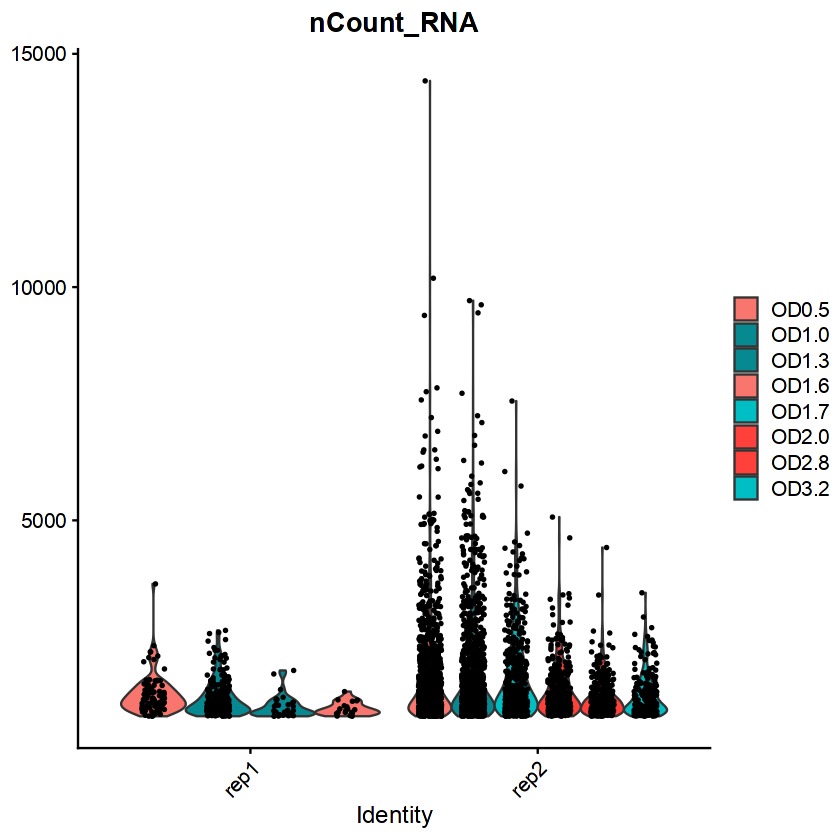

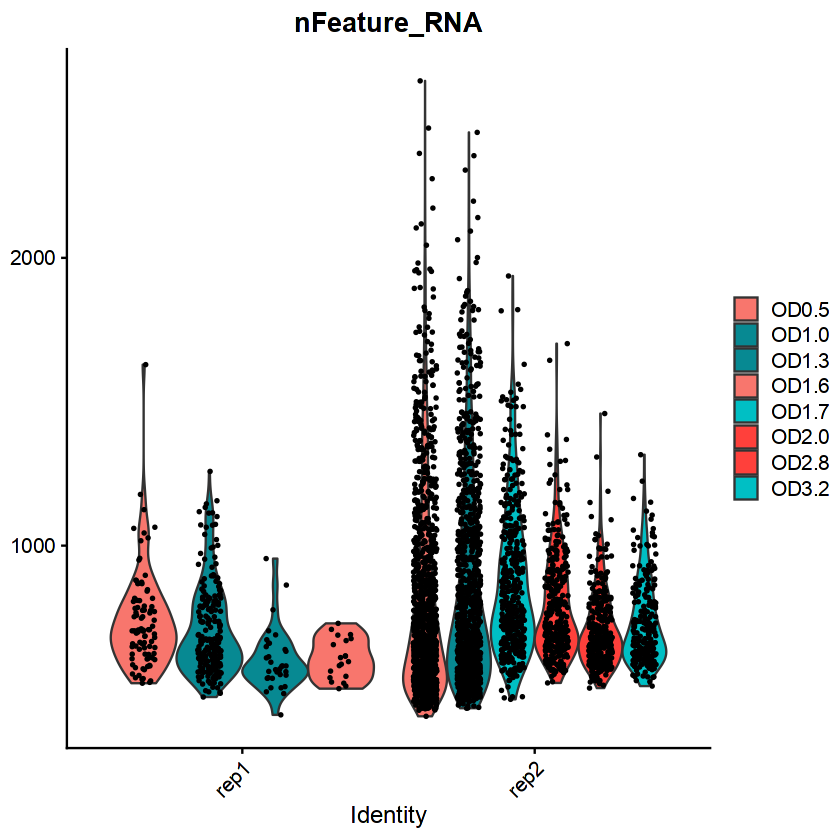

In [27]:
# Si vous avez un objet Seurat, vous pouvez directement faire appel à VlnPlot
VlnPlot(object = RNA_combined, 
  features = c("nCount_RNA", "nFeature_RNA"),
        group.by = "rep", 
        split.by = "cond", 
        pt.size = 0.5, 
        combine = FALSE ,
        fill.by = "cond")

Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”


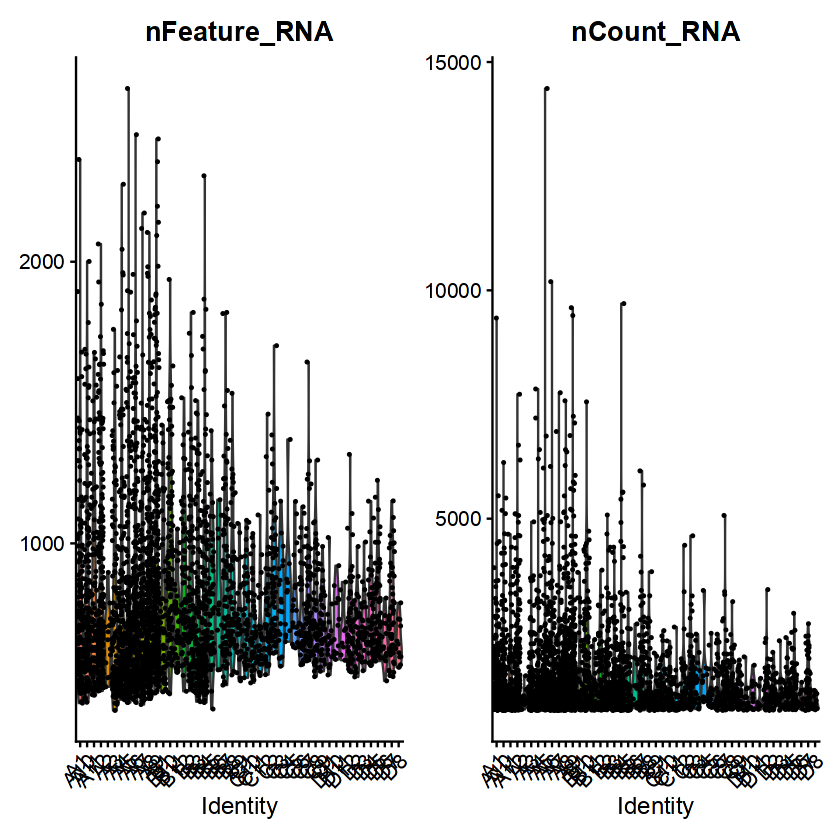

In [ ]:



# Visualize QC metrics as a violin plot
VlnPlot(RNA_combined, features = c("nFeature_RNA", "nCount_RNA"), ncol = 2, group.by = c( "well", "rep" ))

In [ ]:
RNA_combined <- NormalizeData(object = RNA_combined)

In [ ]:
RNA_combined <- FindVariableFeatures(object = RNA_combined)

In [ ]:
RNA_combined <- ScaleData(object = RNA_combined)

In [ ]:
RNA_combined <- RunPCA(object = RNA_combined)

In [ ]:
RNA_combined <- FindNeighbors(object = RNA_combined, dims = 1:30)

In [ ]:
RNA_combined <- FindClusters(object = RNA_combined)

In [ ]:
RNA_combined <- RunUMAP(object = RNA_combined, dims = 1:30)

In [ ]:
DimPlot(object = RNA_combined, reduction = "umap")